In [1]:
import drrdTools as dr
#import drrdTools as dr
import numpy as np

In [2]:
# Information for the raw data file name. Tipically the file
# names are PPPNNN.SSS, where PPP are three digits for the
# prefix (ex. AB1) reflecting the experiment; NNN are the 
# three digits for the animal ID, (064 if animal is 64); and 
# SSS are the three digits for the session (001 for session 1). 
# Example of a filename: AB1064.001
prefix= 'AB1'
animalID= 65
session = 2

# modify the line reflect to your data path
dataPathAB = '/home/mbreyes/ufabc/dados/AB/data/raw/AB1/'
dataPathAH = '/home/mbreyes/Dropbox/ReyesTesti/drrd/dadosBrutos/AH/'

________________________________________________________________________________
539  trials found
[0.  0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2]
Rat7  Trials:539  Reinforced:217  Non-Reinforced:322  Invalid:0



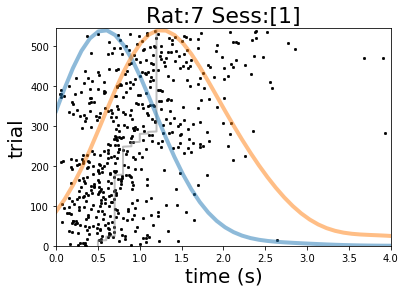

In [3]:
# Extract the data from a file and plot the response during the session
D = dr.drrd(prefix= 'AB1', animalID= 7, sessions = 1, dataPath = dataPathAB)

________________________________________________________________________________
459  trials found
[0.  1.2]
Rat65  Trials:459  Reinforced:286  Non-Reinforced:173  Invalid:0



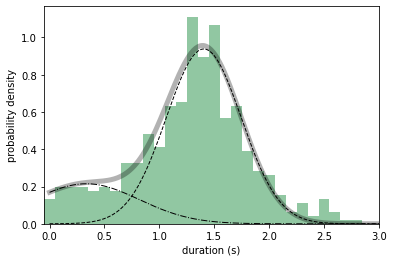

In [4]:
# Example of how to fit a double gaussian
pars = dr.fit_single_animal(animalID,session,plotFlag=True,indexes=(None,None),ax=None, prefix='AB1', dataPath= dataPathAB)

________________________________________________________________________________
586  trials found
[0.    0.7   0.702 0.8   0.9   1.    1.1   1.2  ]
Trying to fix inconsistencies in prime times
Successfully fixed
[0.7]
Rat16  Trials:586  Reinforced:219  Non-Reinforced:367  Invalid:0



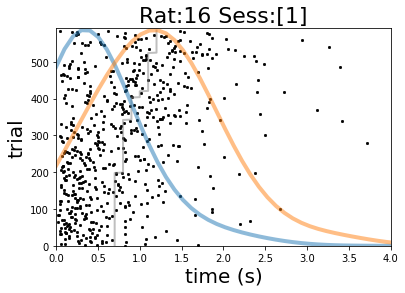

In [5]:
D = dr.drrd('AB1',animalID= 16, sessions= [1], dataPath= dataPathAB, events_to_eliminate= [5,9, 16, 26])

________________________________________________________________________________
821  trials found
[0.  1.2 2. ]
Rat79  Trials:821  Reinforced:150  Non-Reinforced:671  Invalid:0



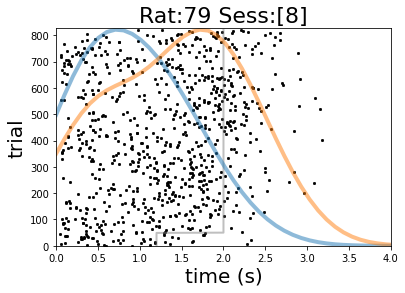

In [6]:
D = dr.drrd('AH0',animalID= 79, sessions= [8], dataPath= dataPathAH, events_to_eliminate= [5,9,16,2])

________________________________________________________________________________
1071  trials found
[0.  1.2 2. ]
Rat81  Trials:1071  Reinforced:93  Non-Reinforced:978  Invalid:0



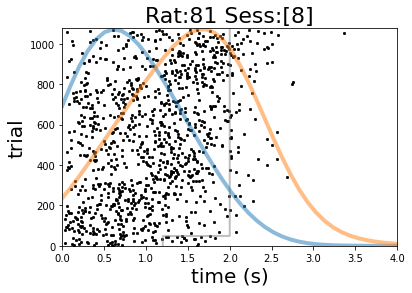

In [7]:
D = dr.drrd('AH0',animalID= 81, sessions= [8], dataPath= dataPathAH, events_to_eliminate= [5,9,16,26])

________________________________________________________________________________
821  trials found
[0.  1.2 2. ]
Rat79  Trials:821  Reinforced:150  Non-Reinforced:671  Invalid:0



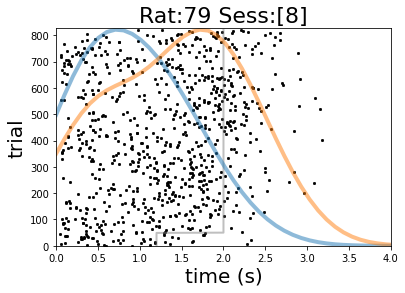

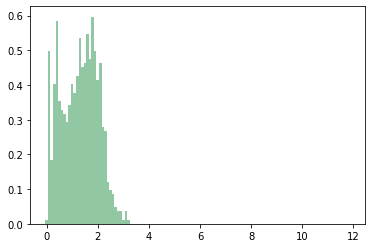

In [8]:
# getting data from file
x = np.arange(0,12,0.1)
D = dr.drrd('AH0',animalID= 79, sessions= [8], dataPath= dataPathAH, events_to_eliminate= [5,9,16,26])
y = dr.calc_histogram(D[:, 0], x)

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(D, columns= ['dt', 'iti', 'primed', 'valid', 'phase', 'session'])

In [11]:
df

,dt,iti,primed,valid,phase,session
0,0.902,1.210,0.0,1.0,1.2,8.0
1,0.592,1.160,0.0,1.0,1.2,8.0
2,0.574,5.928,0.0,1.0,1.2,8.0
3,0.368,12.792,0.0,1.0,1.2,8.0
4,1.128,2.598,0.0,1.0,1.2,8.0
...,...,...,...,...,...,...
816,1.588,2.506,0.0,1.0,2.0,8.0
817,2.116,5.936,1.0,1.0,2.0,8.0
818,1.264,2.116,0.0,1.0,2.0,8.0
819,0.976,1.330,0.0,1.0,2.0,8.0


In [12]:
# procurando trials subsequentes a uma trial reforçada
# importante: usamos dois iloc's porque é preciso restringir a procura
# dos índices até a penúltima linha
D2 = np.array(df.iloc[df.iloc[:-1,:].query('primed == 1').index + 1,:])
D2.round(3)

array([[ 1.362, 16.04 ,  1.   ,  1.   ,  1.2  ,  8.   ],
       [ 0.502,  0.16 ,  0.   ,  1.   ,  1.2  ,  8.   ],
       [ 1.184,  1.444,  0.   ,  1.   ,  1.2  ,  8.   ],
       [ 0.266,  2.44 ,  0.   ,  1.   ,  1.2  ,  8.   ],
       [ 2.324,  1.682,  1.   ,  1.   ,  1.2  ,  8.   ],
       [ 0.738,  0.236,  0.   ,  1.   ,  1.2  ,  8.   ],
       [ 0.426,  6.66 ,  0.   ,  1.   ,  1.2  ,  8.   ],
       [ 0.3  ,  3.19 ,  0.   ,  1.   ,  1.2  ,  8.   ],
       [ 1.772,  2.542,  1.   ,  1.   ,  1.2  ,  8.   ],
       [ 1.758,  2.526,  1.   ,  1.   ,  1.2  ,  8.   ],
       [ 0.566,  3.166,  0.   ,  1.   ,  1.2  ,  8.   ],
       [ 1.286,  1.22 ,  0.   ,  1.   ,  2.   ,  8.   ],
       [ 1.032,  1.688,  0.   ,  1.   ,  2.   ,  8.   ],
       [ 1.572,  1.604,  0.   ,  1.   ,  2.   ,  8.   ],
       [ 0.118,  0.082,  0.   ,  1.   ,  2.   ,  8.   ],
       [ 1.364,  1.814,  0.   ,  1.   ,  2.   ,  8.   ],
       [ 0.86 ,  3.376,  0.   ,  1.   ,  2.   ,  8.   ],
       [ 1.162,  1.848,  0.   ,

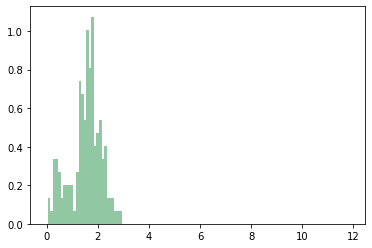

In [13]:
y2 = dr.calc_histogram(D2[:, 0], x)

In [14]:
import matplotlib.pyplot as plt

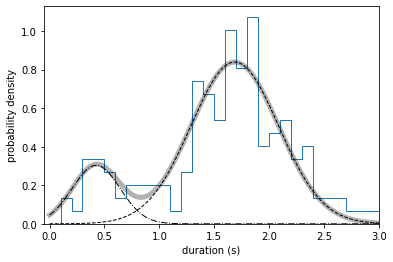

In [15]:
dr.fit_single_animal_from_matrix(D2,y2, 81, 8, plotFlag=True, indexes=(0, None), ax=None, prefix='AL0')
plt.stairs(y2[:-1],x)

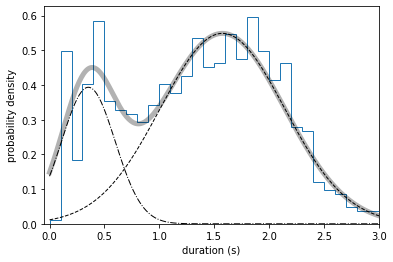

In [16]:
dr.fit_single_animal_from_matrix(D,y, 81, 8, plotFlag=True, indexes=(0, None), ax=None, prefix='AL0')
plt.stairs(y[:-1],x)

In [17]:
bad_animals  = [86, 87, 88, 89, 89, 89, 89, 103, 106, 107, 109] 
bad_sessions = [21,  1,  3,  2,  3, 18, 20,  12,   1,   1,   9]

86 21
________________________________________________________________________________
79  trials found
[0]
Rat86  Trials:79  Reinforced:0  Non-Reinforced:79  Invalid:0

Number of trials to split too large, trials split in half


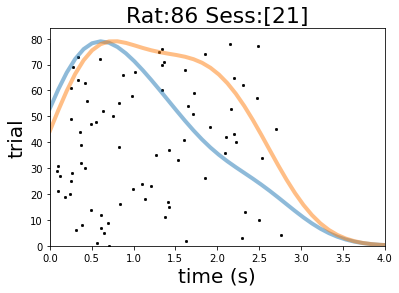

In [22]:
k=0
print(bad_animals[k],bad_sessions[k])
D = dr.drrd(prefix= 'AH0', animalID= bad_animals[k], sessions= [bad_sessions[k]], dataPath= dataPathAH, events_to_eliminate= None)